In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("HydroData_CleanedAndMerged.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.rename(columns={'generation hydro pumped storage consumption': 'consumption', 'generation hydro run-of-river and poundage': 'poundage', 
                   'generation hydro water reservoir': 'reservoir'}, inplace=True)

from datetime import datetime
df['time'] = [datetime.strptime(dt[:-6], '%Y-%m-%d %H:%M:%S') for dt in df['time']]
print(type(df['time'][0]))

# df.head()
# df.tail()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Grouping data daywise

In [3]:
grouped_data = df.groupby(pd.Grouper(key='time', freq='D'))#.sum()
result = grouped_data[['consumption', 'poundage', 'reservoir', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all']].sum()
result['temp'] = grouped_data['temp'].median()
result['pressure'] = grouped_data['pressure'].mean()
result['humidity'] = grouped_data['humidity'].mean()
result['wind_speed'] = grouped_data['wind_speed'].mean()
result['wind_deg'] = grouped_data['wind_deg'].mean()

result.reset_index(inplace=True)
result.head()

,time,consumption,poundage,reservoir,rain_1h,rain_3h,snow_3h,clouds_all,temp,pressure,humidity,wind_speed,wind_deg
0,2015-01-01,25690.0,25149.0,52005.0,0.00,0.0,0.0,18.4,275.423900,1021.991667,75.391667,1.950000,181.600000
1,2015-01-02,37048.0,31045.0,89159.0,0.00,0.0,0.0,143.4,276.434500,1024.441667,77.833333,1.575000,214.408333
2,2015-01-03,32123.0,32994.0,95266.0,0.00,0.0,0.0,54.8,276.941384,1020.741667,78.591667,1.575000,191.033333
3,2015-01-04,14160.0,35886.0,77792.0,1.02,0.0,0.0,274.4,278.064019,1015.858333,76.766667,1.258333,156.408333
4,2015-01-05,19747.0,19814.0,43206.0,0.30,0.0,0.0,427.6,277.911800,1014.508333,81.158333,1.150000,174.300000


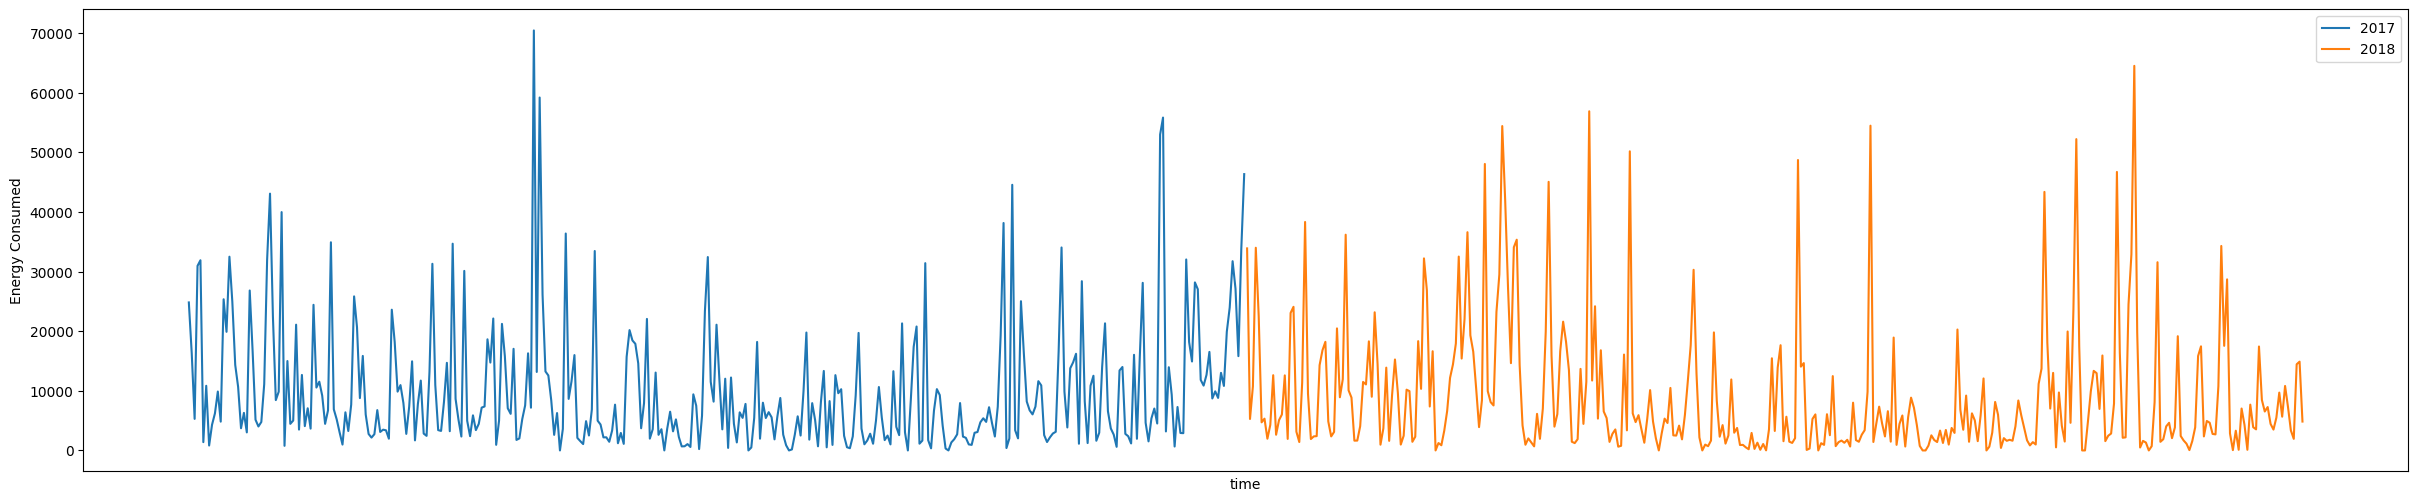

In [4]:
df = result
del result
plt.figure(figsize=(30,6))
plt.plot(df[[str(c)[:4] == '2017' for c in df['time']]]['time'], df[[str(c)[:4] == '2017' for c in df['time']]]['consumption'], 
         label = "2017")
plt.plot(df[[str(c)[:4] == '2018' for c in df['time']]]['time'], df[[str(c)[:4] == '2018' for c in df['time']]]['consumption'],
         label = '2018')
# plt.plot(df[[str(c)[:7] == '2018-12' for c in df['time']]]['time'], df[[str(c)[:7] == '2018-12' for c in df['time']]]['consumption'],
#          label = 'Last month of 2018')

plt.tick_params(left = True, right = False , labelleft = True , 
                labelbottom = False, bottom = False)
plt.ylabel("Energy Consumed")
plt.xlabel("time")
plt.legend()
# plt.set_xticks()
plt.show()


In [5]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(df) * .8)
training_data_len 
 
#Splitting the dataset
train_data = df[:training_data_len].iloc[:,1:2] 
test_data = df[training_data_len:].iloc[:,1:2]
print(train_data.shape, test_data.shape)

(1169, 1) (292, 1)


In [6]:
# Selecting consumption Price values
dataset_train = train_data['consumption'].values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(1169, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
 
print(scaled_train[:5])

[[0.36461438]
 [0.5258168 ]
 [0.455917  ]
 [0.20097079]
 [0.28026626]]


In [8]:
# Selecting consumption Price values
dataset_test = test_data['consumption'].values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(*scaled_test[:5])

[0.50407638] [0.23894107] [0.34233857] [0.56743854] [0.29932732]


In [9]:
# Selecting consumption Price values
dataset_test = test_data['consumption'].values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(*scaled_test[:5])

[0.50407638] [0.23894107] [0.34233857] [0.56743854] [0.29932732]


In [10]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train[:50])
        print(y_train[:50])
        print()

[array([0.36461438, 0.5258168 , 0.455917  , 0.20097079, 0.28026626,
       0.07597434, 0.04631128, 0.13774163, 0.05563598, 0.0585881 ,
       0.5615544 , 0.08156632, 0.18728888, 0.13813903, 0.26515087,
       0.34316898, 0.25166766, 0.34773908, 0.24505379, 0.0966959 ,
       0.20414999, 0.2750291 , 0.23633938, 0.25850862, 0.45026824,
       0.21665389, 0.15782452, 0.18697664, 0.25163927, 0.37026314,
       0.33702347, 0.15854836, 0.14631412, 0.18154078, 0.19410145,
       0.29330949, 0.01823782, 0.04912146, 0.36049845, 0.05593403,
       0.08732862, 0.21233927, 0.09321866, 0.17279798, 0.52205569,
       0.55545147, 0.16646797, 0.56381106, 0.26205683, 0.12353459])]
[0.06010673025064577]

[array([0.36461438, 0.5258168 , 0.455917  , 0.20097079, 0.28026626,
       0.07597434, 0.04631128, 0.13774163, 0.05563598, 0.0585881 ,
       0.5615544 , 0.08156632, 0.18728888, 0.13813903, 0.26515087,
       0.34316898, 0.25166766, 0.34773908, 0.24505379, 0.0966959 ,
       0.20414999, 0.2750291 , 0.23

In [11]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [12]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (1119, 50, 1) y_train : (1119, 1)


In [13]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (242, 50, 1) y_test : (242, 1)


In [14]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD    
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [28]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'Adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
# regressorLSTM.fit(X_train, 
# 				y_train, 
# 				batch_size = 1, 
# 				epochs = 12)
regressorLSTM.summary()

c:\Users\raosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 24)

Epoch 1/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.0059 - loss: 0.0250
Epoch 2/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0043 - loss: 0.0289
Epoch 3/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.0059 - loss: 0.0277
Epoch 4/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0070 - loss: 0.0247
Epoch 5/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0065 - loss: 0.0277
Epoch 6/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.0056 - loss: 0.0251
Epoch 7/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - accuracy: 0.0079 - loss: 0.0251
Epoch 8/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.0072 - loss: 0.0270
Epoch 9/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - accuracy: 0.0068 - loss: 0.0241
Epoch 10/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.0079 - loss: 0.0233
Epoch 11/24
1119/1119 ━━━━━━━━━━━━━━━━━━━━ 51s 45ms/step - accuracy: 0.0063 - loss: 0.0240
Epoch 12

In [30]:
# predictions with X_test data
y_LSTM = regressorLSTM.predict(X_test)
# scaling back from 0-1 to original
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


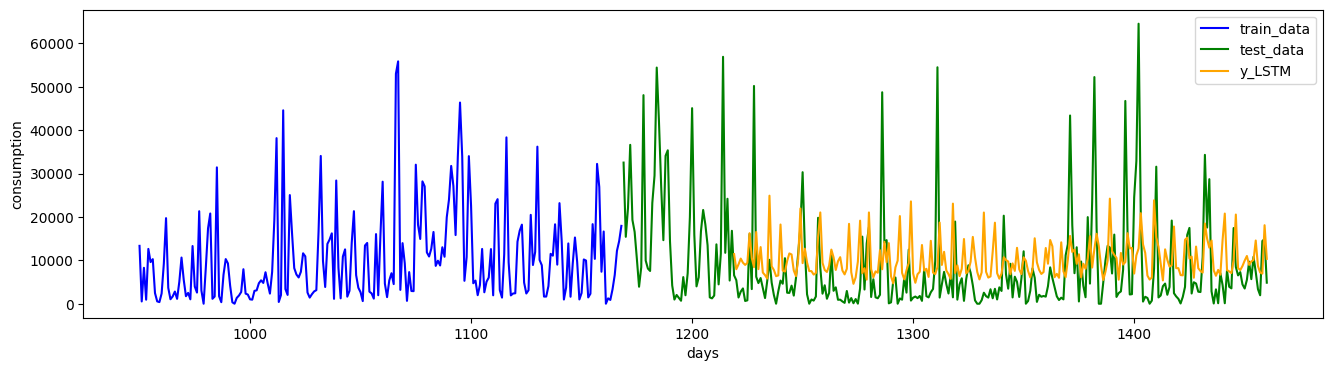

In [32]:
#Plot for LSTM predictions
plt.figure(figsize=(16,4))
plt.plot(train_data.index[950:], train_data.consumption[950:], label = "train_data", color = "b")
plt.plot(test_data.index, test_data.consumption, label = "test_data", color = "g")
plt.plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
plt.legend()
# plt.title.set_text("LSTM")

plt.xlabel("days")
plt.ylabel("consumption")
 
plt.show()

In [37]:
import keras
regressorLSTM.save("regressorLSTM_consumption.keras")
loaded_model = keras.saving.load_model("regressorLSTM_consumption.keras")

In [38]:
# predictions with X_test data
y_LSTM = loaded_model.predict(X_test)
# scaling back from 0-1 to original
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


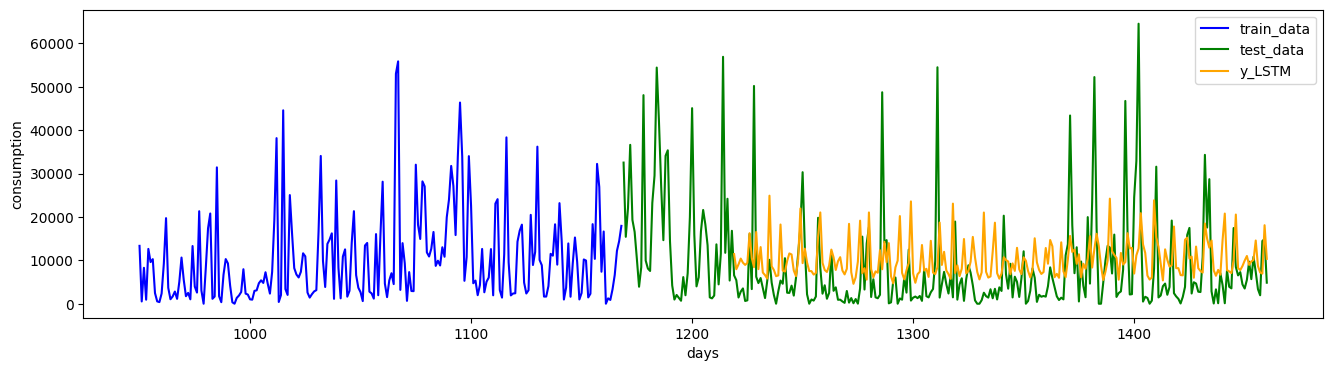

In [39]:
#Plot for LSTM predictions
plt.figure(figsize=(16,4))
plt.plot(train_data.index[950:], train_data.consumption[950:], label = "train_data", color = "b")
plt.plot(test_data.index, test_data.consumption, label = "test_data", color = "g")
plt.plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
plt.legend()
# plt.title.set_text("LSTM")

plt.xlabel("days")
plt.ylabel("consumption")
 
plt.show()

# Hourly data (Unsuccessfull)

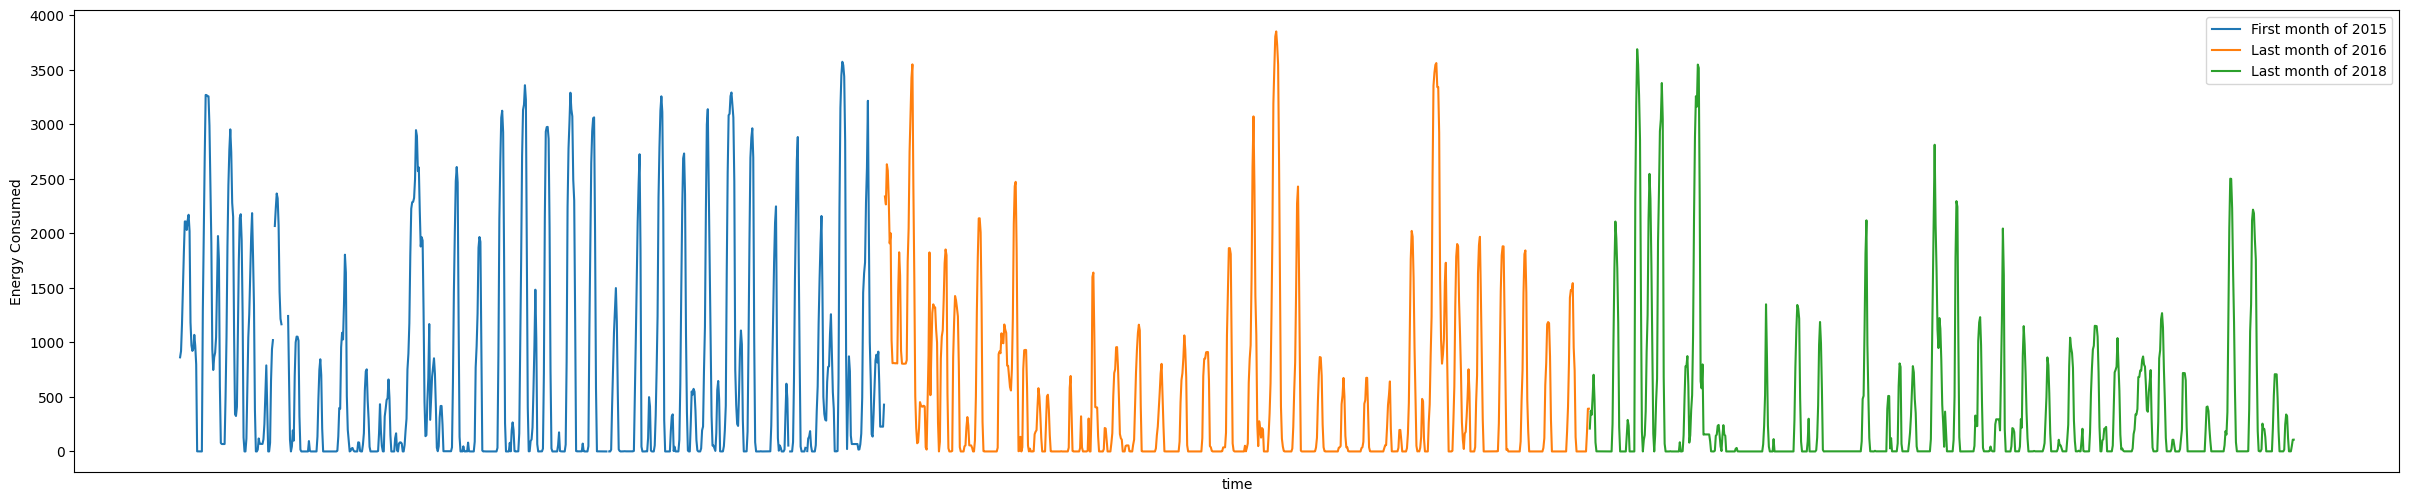

In [3]:
plt.figure(figsize=(30,6))
plt.plot(df[[str(c)[:7] == '2015-01' for c in df['time']]]['time'], df[[str(c)[:7] == '2015-01' for c in df['time']]]['consumption'], 
         label = "First month of 2015")
plt.plot(df[[str(c)[:7] == '2016-12' for c in df['time']]]['time'], df[[str(c)[:7] == '2016-12' for c in df['time']]]['consumption'],
         label = 'Last month of 2016')
plt.plot(df[[str(c)[:7] == '2018-12' for c in df['time']]]['time'], df[[str(c)[:7] == '2018-12' for c in df['time']]]['consumption'],
         label = 'Last month of 2018')

plt.tick_params(left = True, right = False , labelleft = True , 
                labelbottom = False, bottom = False)
plt.ylabel("Energy Consumed")
plt.xlabel("time")
plt.legend()
# plt.set_xticks()
plt.show()


In [4]:
# Setting 90 percent data for training
training_data_len = math.ceil(len(df) * .9)
training_data_len 
 
#Splitting the dataset
train_data = df[:training_data_len].iloc[:,1:2] 
test_data = df[training_data_len:].iloc[:,1:2]
print(train_data.shape, test_data.shape)

(31558, 1) (3506, 1)


In [5]:
# Selecting consumption Price values
dataset_train = train_data['consumption'].values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(31558, 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
 
print(scaled_train[:5])

[[0.19080256]
 [0.20340482]
 [0.25735132]
 [0.33230157]
 [0.40371435]]


In [7]:
# Selecting consumption Price values
dataset_test = test_data['consumption'].values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(*scaled_test[:5])

[0.] [0.00072727] [0.03030303] [0.03757576] [0.03733333]


In [8]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train[:50])
        print(y_train[:50])
        print()

[array([1.90802565e-01, 2.03404820e-01, 2.57351315e-01, 3.32301570e-01,
       4.03714349e-01, 4.66283440e-01, 4.66062348e-01, 4.49038249e-01,
       4.68494362e-01, 4.79770064e-01, 4.46606235e-01, 2.61552067e-01,
       2.14901614e-01, 2.03847004e-01, 2.08047756e-01, 2.36347557e-01,
       2.14459430e-01, 1.76431572e-01, 2.21092195e-04, 2.21092195e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.85208932e-01, 4.41300022e-01, 5.96506743e-01, 7.22750387e-01,
       7.22308203e-01, 7.20318373e-01, 7.19876188e-01, 6.60402388e-01,
       5.41012602e-01, 4.21622817e-01, 2.07384479e-01, 1.65155870e-01,
       1.91023657e-01, 2.00309529e-01, 2.31483529e-01, 3.29648463e-01,
       4.36657086e-01, 3.89122264e-01, 1.31549856e-01, 1.72451912e-02,
       1.50342693e-02, 1.50342693e-02, 1.50342693e-02, 1.50342693e-02,
       1.10988282e-01, 2.31704621e-01])]
[0.41565332743754146]

[array([1.90802565e-01, 2.03404820e-01, 2.57351315e-01, 3.32301570e-01,
       4.03

In [9]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [10]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (31508, 50, 1) y_train : (31508, 1)


In [11]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (3456, 50, 1) y_test : (3456, 1)


In [12]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD    
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [30]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'Adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
# regressorLSTM.fit(X_train, 
# 				y_train, 
# 				batch_size = 1, 
# 				epochs = 12)
regressorLSTM.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# predictions with X_test data
y_LSTM = regressorLSTM.predict(X_test)
# scaling back from 0-1 to original
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


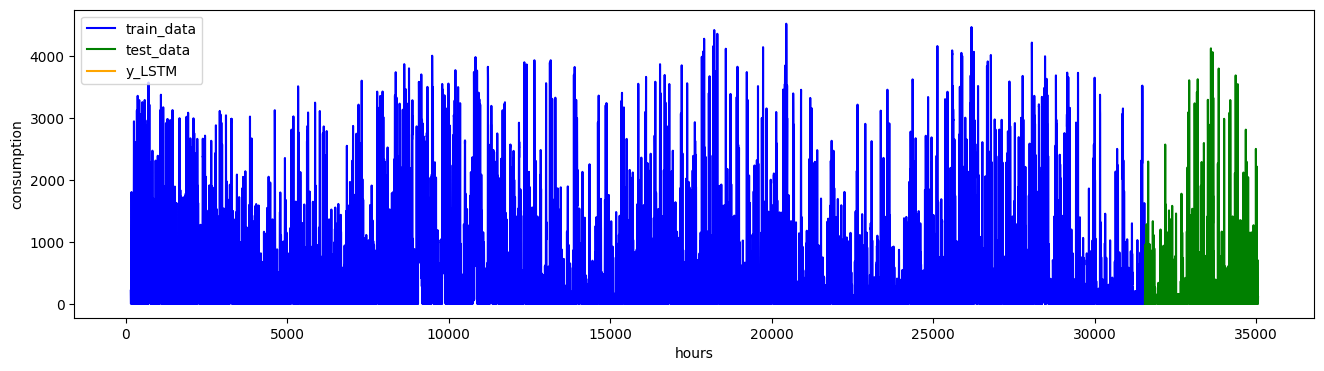

In [20]:
#Plot for LSTM predictions
plt.figure(figsize=(16,4))
plt.plot(train_data.index[150:], train_data.consumption[150:], label = "train_data", color = "b")
plt.plot(test_data.index, test_data.consumption, label = "test_data", color = "g")
plt.plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
plt.legend()
# plt.title.set_text("LSTM")

plt.xlabel("hours")
plt.ylabel("consumption")
 
plt.show()

In [26]:
y_LSTM = regressorLSTM.predict(X_test[0].reshape(1,50,1))
# scaling back from 0-1 to original
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [1]:
# regressorLSTM.save("regressorLSTM_35K.keras")
# loaded_model = tf.keras.saving.load_model("regressorLSTM_35K.keras")